## Video Models

In [ ]:
import torch
import diffusers
import transformers
import cv2

## Generating Video With Diffusion

In [ ]:
from diffusers import StableVideoDiffusionPipeline

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [ ]:
pipe = StableVideoDiffusionPipeline.from_pretrained("stabilityai/stable-video-diffusion-img2vid-xt",
                                                    torch_dtype=torch.float16,
                                                    variant="fp16")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/984 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

image_encoder/model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/196M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/3.05G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
pipe

StableVideoDiffusionPipeline {
  "_class_name": "StableVideoDiffusionPipeline",
  "_diffusers_version": "0.36.0",
  "_name_or_path": "stabilityai/stable-video-diffusion-img2vid-xt",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    "transformers",
    "CLIPVisionModelWithProjection"
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "unet": [
    "diffusers",
    "UNetSpatioTemporalConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKLTemporalDecoder"
  ]
}

In [ ]:
path = "elmo.jpg"

In [ ]:
path

'elmo.jpg'

In [ ]:
from diffusers.utils import load_image, export_to_video

In [ ]:
image = load_image(path)

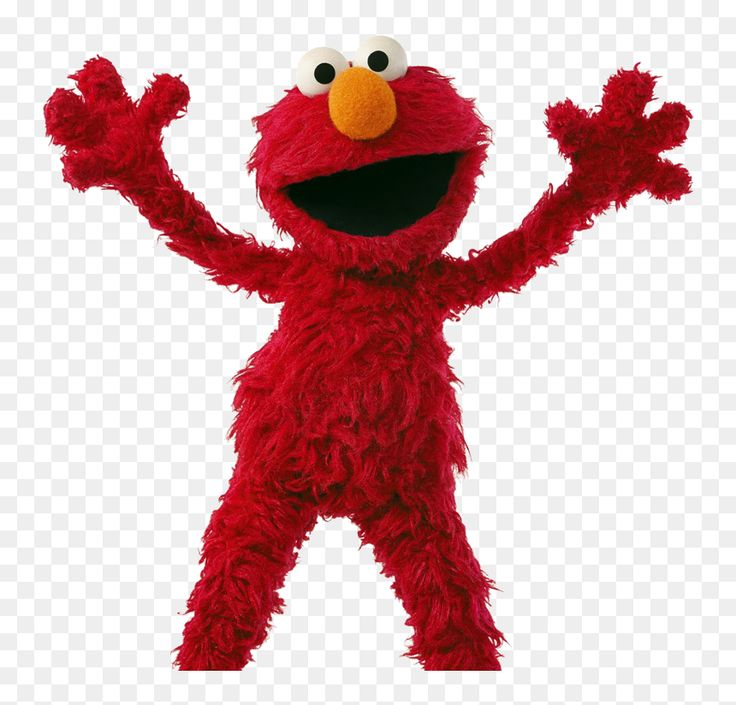

In [ ]:
image

In [ ]:
pipe.enable_model_cpu_offload()

In [ ]:
generator = torch.manual_seed(42)

In [ ]:
generator

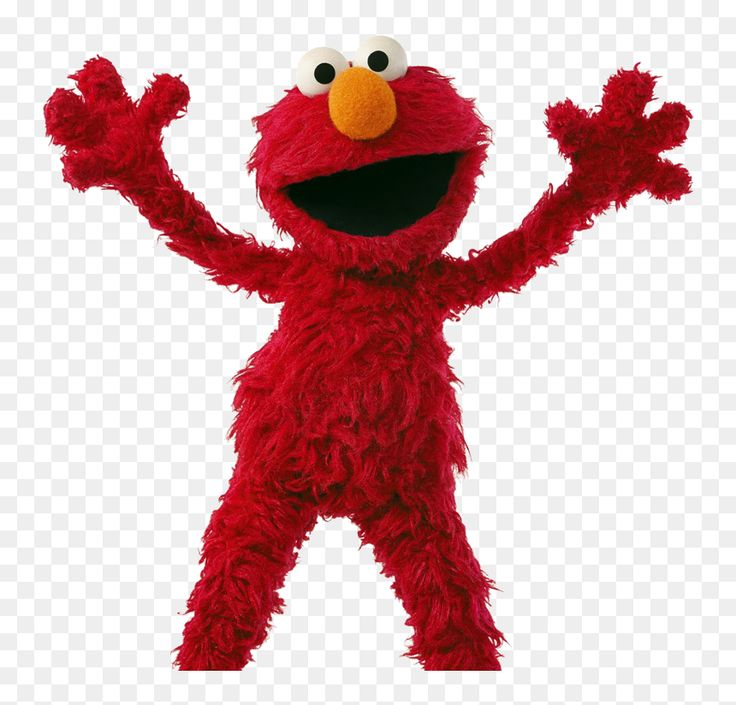

In [ ]:
image

In [ ]:
frames = pipe(image, decode_chunk_size=8, generator=generator).frames[0]

  0%|          | 0/25 [00:00<?, ?it/s]

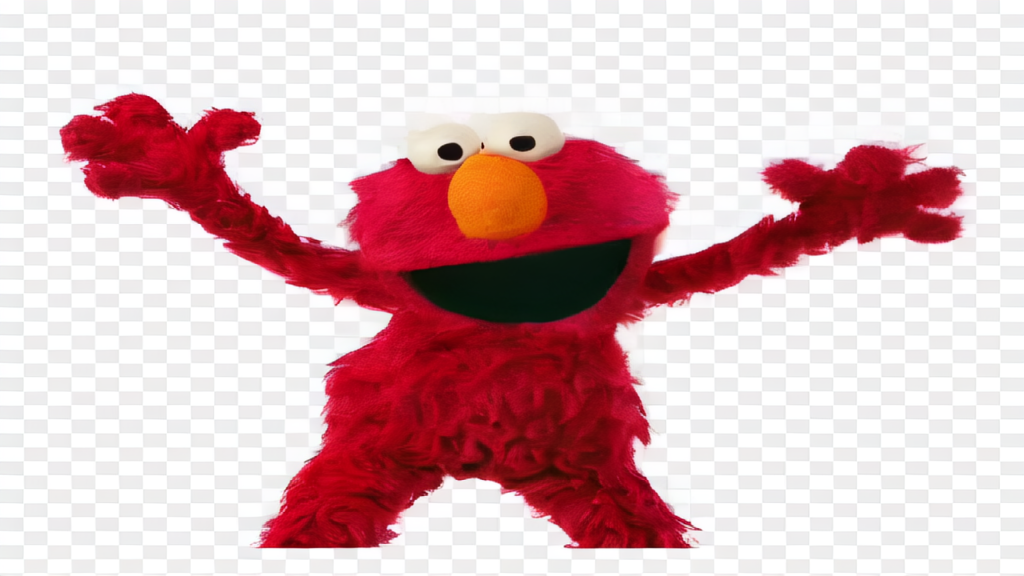

In [ ]:
frames[5]

In [ ]:
frames

[<PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image im

In [ ]:
export_to_video(frames, "elmo.mp4", fps=7) # Frames per second

'elmo.mp4'

## Generating Video using another diffusion model (Using Image & Prompt)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from diffusers import I2VGenXLPipeline

In [ ]:
from diffusers.utils import load_image, export_to_video

In [ ]:
repo_id = "ali-vilab/i2vgen-xl"

In [ ]:
pipeline = I2VGenXLPipeline.from_pretrained(repo_id,
                                            torch_dtype=torch.float16,
                                            variant="fp16")

model_index.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/706M [00:00<?, ?B/s]

image_encoder/model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/2.84G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/637 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The I2VGenXLPipeline has been deprecated and will not receive bug fixes or feature updates after Diffusers version 0.33.1. 


In [ ]:
pipeline.enable_model_cpu_offload()

In [ ]:
sea = load_image("sea.jpg")

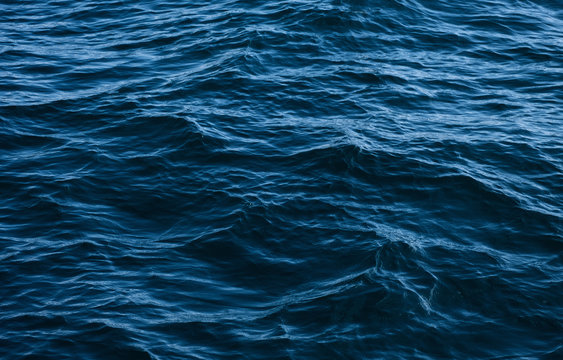

In [ ]:
sea

In [ ]:
prompt = "The sea waves heavily"

In [ ]:
generator = torch.manual_seed(42)

In [ ]:
frames = pipeline(prompt=prompt,
                  image=sea,
                  num_frames=16, # Feel free to play around with numbr of frames
                  generator=generator).frames[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
len(frames)

16

In [ ]:
export_to_video(frames, "sea_waves.mp4", fps=8)

'sea_waves.mp4'